In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Data Exploration: Load and visualize the data.**

In [37]:
df = pd.read_csv('/content/drive/MyDrive/GENAI/Week4/Day2/ex2data1.txt', header = None)
df.columns = ["Exam1_score", "Exam2_score", "Admitted"]
df.head()

,Exam1_score,Exam2_score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [40]:
df.drop_duplicates(inplace=True)

On supprime les lignes en double dans notre dataframe

In [41]:
df.shape

(100, 3)

Il y a 100 lignes disctinctes dans notre dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Exam1_score  100 non-null    float64
 1   Exam2_score  100 non-null    float64
 2   Admitted     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [43]:
df.describe()

,Exam1_score,Exam2_score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [44]:
df.isna().sum()

,0
Exam1_score,0
Exam2_score,0
Admitted,0


Le dataframe ne comporte pas de valeurs nuls

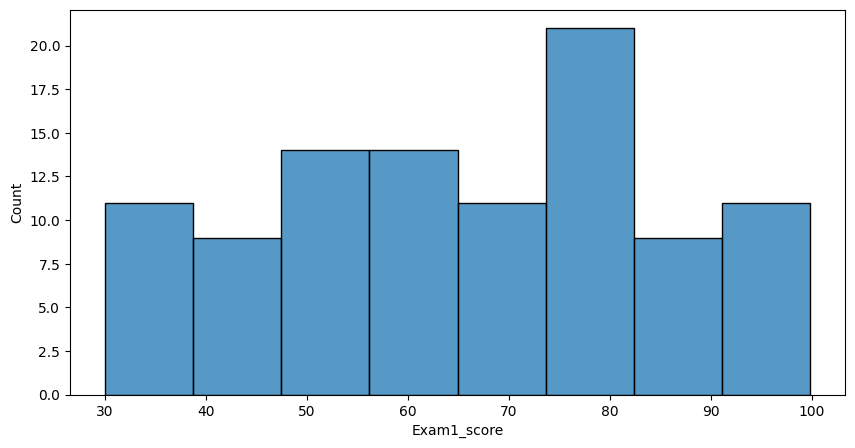

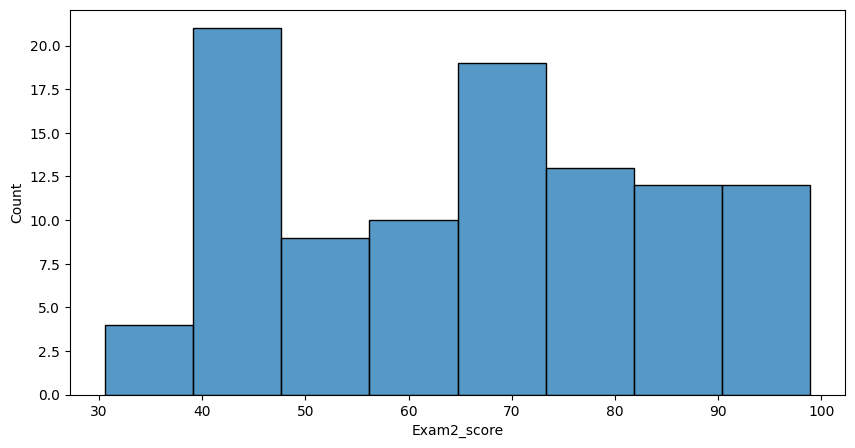

In [45]:
for col in df.columns[:-1]:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.show()

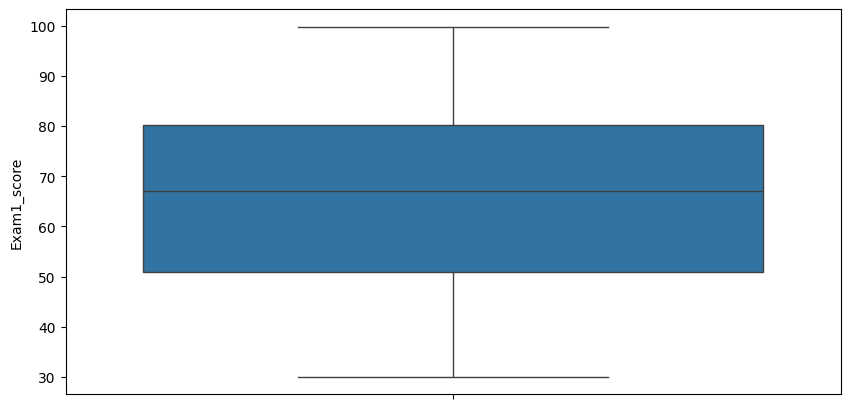

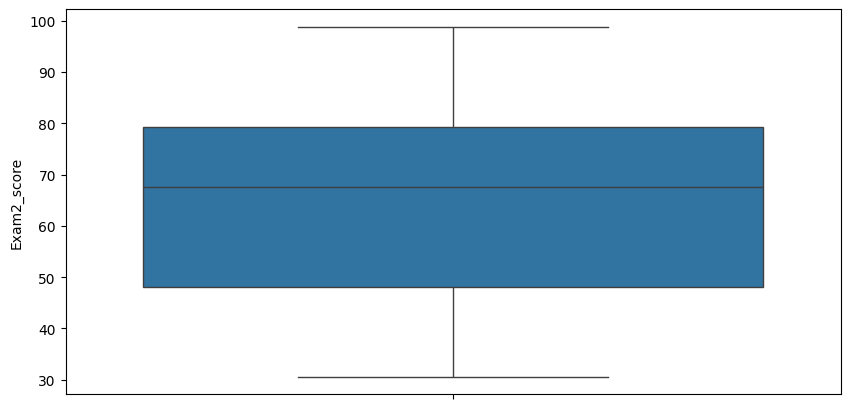

In [46]:
for col in df.columns[:-1]:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [47]:
for col in df.columns[:-1]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df[((df[col] < lower) | (df[col] > upper))]
outliers

,Exam1_score,Exam2_score,Admitted


Il n'y a pas d'outliers concernant les notes atribuées aux élèves

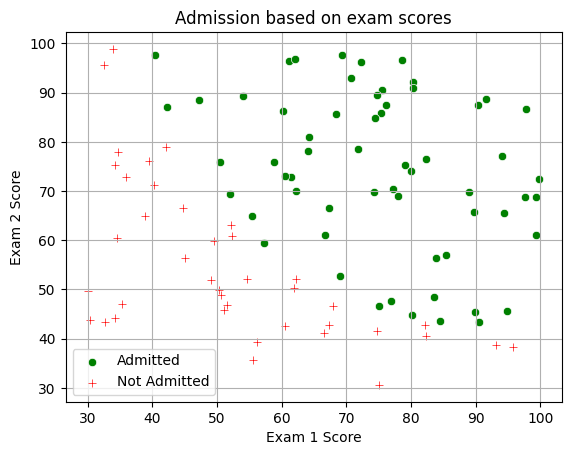

In [55]:
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

sns.scatterplot(data=admitted, x="Exam1_score", y="Exam2_score", label="Admitted", color="green", marker = "o")
sns.scatterplot(data=not_admitted, x="Exam1_score", y="Exam2_score", label="Not Admitted", color="red", marker = "+")

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Admission based on exam scores')
plt.grid(True)
plt.show()

On remarque qu'il n'y a pas de séparation linéaire nette entre les élèves admis et ceux qui ne le sont pas.

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Exam1_score", "Exam2_score"]] = scaler.fit_transform(df[["Exam1_score", "Exam2_score"]])

On normalise les données car certains modèles peuvent être sensible aux écarts de grandeur entre les features

# **Applying Logistic Regression with scikit-learn:**

On applique une logistic regression sur nos features d'entrainement dans l'objectif d'entrainer le modèle a prédire si oui ou non un elève sera admis, et ce en fonction de ses notes

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = ["Exam1_score", "Exam2_score"]

x = df[features]
y = df.drop(features, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[2.95706535 2.43366786]]
Intercept: [-2.32341615]


On affiche les notes des élèves admis et non admis ainsi que la decision boudary qui sépare les deux catégories.

In [71]:
x_values_scaled = np.linspace(x_train["Exam1_score"].min(), x_train["Exam1_score"].max(), 100)

In [73]:
y_values_scaled = (-intercept - coefficients[0][0] * x_values_scaled) / coefficients[0][1]

In [76]:
boundary_points_scaled = np.vstack([x_values_scaled, y_values_scaled]).T

In [79]:
boundary_points_original = scaler.inverse_transform(boundary_points_scaled)

In [81]:
x_values_original_boundary = boundary_points_original[:, 0]

In [82]:
y_values_original_boundary = boundary_points_original[:, 1]

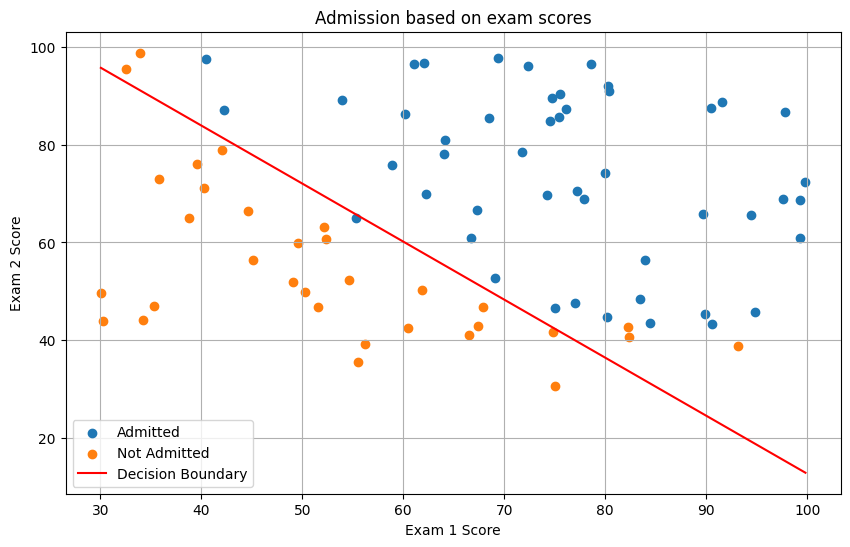

In [83]:
df_original = pd.read_csv('/content/drive/MyDrive/GENAI/Week4/Day2/ex2data1.txt', header = None)
df_original.columns = ["Exam1_score", "Exam2_score", "Admitted"]
df_original.drop_duplicates(inplace=True)

x_original = df_original[features]
y_original = df_original.drop(features, axis=1)
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(x_original, y_original, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(x_train_original[y_train_original['Admitted'] == 1]["Exam1_score"], x_train_original[y_train_original['Admitted'] == 1]["Exam2_score"], label ='Admitted')
plt.scatter(x_train_original[y_train_original['Admitted'] == 0]["Exam1_score"], x_train_original[y_train_original['Admitted'] == 0]["Exam2_score"], label ='Not Admitted')
plt.plot(x_values_original_boundary, y_values_original_boundary, 'r', label='Decision Boundary')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Admission based on exam scores')
plt.legend()
plt.grid(True)
plt.show()

**Making Predictions:**

on prédit la catégorie de chaque élève en fonction de ses notes

In [87]:
y_pred = model.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy" : [accuracy_score(y_test, y_pred)],
    "Precision" : [precision_score(y_test, y_pred)],
    "Recall" : [recall_score(y_test, y_pred)],
    "F1 Score" : [f1_score(y_test, y_pred)]
}

metrics = pd.DataFrame(metrics, index=["Logistic regression"]).T
metrics

,Logistic regression
Accuracy,0.850000
Precision,0.909091
Recall,0.833333
F1 Score,0.869565


# **Model Evaluation:**

* La ligne rouge sur le graphique correspond a la decision
boudary défine par le modèle. Cette frontière sépare les  classes(admis, pas admis)
* L'accuracy de 0,85 signifie que le modèle a correctement prédit le résultat d'admission pour 85% des données.
* La précision à 0,9 signifie que tous les fois ou le modèle à prédit qu'une personne devait être admise, celle-ci l'était réellement.
* Le recall à 0,83 signifie que que parmis tous les personnes censées être admises, 83% ont été détéctées.